In [ ]:
!pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
 pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/29/a2/d40fb2460e883eca5199c62cfc2463fd261f760556ae6290f88488c362c0/pip-25.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 653.6 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/1.8 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/375.9 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 4.2/375.9 MB 10.1 MB/s eta 0:00:37
    --------------------------------------- 6.3/375.9 MB 9.9 MB/s eta 0:00:38
    --------------------------------------- 8.4/375.9 MB 10.0 MB/s eta 0:00:37
   - -------------------------------------- 10.7/375.9 MB 9.9 MB/s eta 0:00:38
   - --------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

ImportError: Traceback (most recent call last):
  File "c:\Users\Aline\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Uma rotina de inicialização da biblioteca de vínculo dinâmico (DLL) falhou.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [3]:
caminho = r'G:\.shortcut-targets-by-id\1oE-zIqZbRz2ez0t_V-LtSwaX3WOtwg9E\TCC - Aline e Gabi'

import os

# Testa se a pasta existe
if os.path.exists(caminho):
    print("✅ O caminho existe!")
    # Lista os arquivos/pastas dentro dela
    print("Conteúdo da pasta:", os.listdir(caminho))
else:
    print("❌ O caminho NÃO existe ou não está acessível.")

✅ O caminho existe!
Conteúdo da pasta: ['videos_libras', 'gestures_dataset']


In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Treinando em:", device)

Treinando em: cuda


In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3060


In [4]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms

# ------ Configurações ------
model_path = 'cnn_lstm_model.pth'
dataset_path = 'D:\\Everaldo\\Pictures\\temp_gestures_dataset'
max_len = 30
frame_size = (224, 224)

# ------ Modelo CNN + LSTM ------
class CNNLSTMModel(nn.Module):
    def __init__(self, cnn_output_size, hidden_size, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.lstm = nn.LSTM(input_size=cnn_output_size, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.size()
        c_out = []
        for i in range(seq_len):
            cnn_out = self.cnn(x[:, i])
            cnn_out = cnn_out.view(batch_size, -1)
            c_out.append(cnn_out)
        cnn_out_seq = torch.stack(c_out, dim=1)
        lstm_out, _ = self.lstm(cnn_out_seq)
        out = self.fc(lstm_out[:, -1])
        return out

# ------ Obter mapeamento de classes ------
def get_class_map(dataset_path):
    gestures = sorted(os.listdir(dataset_path))
    return {idx: gesture for idx, gesture in enumerate(gestures)}

# ------ Carrega modelo ------
class_map = get_class_map(dataset_path)
num_classes = len(class_map)
model = CNNLSTMModel(cnn_output_size=32 * 56 * 56, hidden_size=128, num_classes=num_classes)
model.load_state_dict(torch.load(model_path))
model.eval()

# ------ Transformação para imagens ------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(frame_size)
])

C:\Users\Everaldo\AppData\Local\Temp\ipykernel_22268\3058889821.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [10]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import cv2

class GestureDataset(Dataset):
    def __init__(self, base_path, max_len=30, use_raw=True, use_aug=True):
        self.sequences = []
        self.labels = []
        self.class_to_idx = {}

        gestures = sorted(os.listdir(base_path))
        for idx, gesture in enumerate(gestures):
            gesture_path = os.path.join(base_path, gesture)
            if not os.path.isdir(gesture_path):
                continue
            self.class_to_idx[gesture] = idx
            for seq_folder in os.listdir(gesture_path):
                seq_path = os.path.join(gesture_path, seq_folder)
                if not os.path.isdir(seq_path):
                    continue

                if use_raw:
                    frames_path = os.path.join(seq_path, 'raw')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

                if use_aug:
                    frames_path = os.path.join(seq_path, 'aug')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

        self.max_len = max_len
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        frames = self.sequences[idx]
        label = self.labels[idx]
        tensor_seq = []

        for fpath in frames[:self.max_len]:
            img = cv2.imread(fpath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            tensor = self.transform(img)
            tensor_seq.append(tensor)

        while len(tensor_seq) < self.max_len:
            tensor_seq.append(torch.zeros_like(tensor_seq[0]))

        tensor_seq = torch.stack(tensor_seq)
        return tensor_seq, torch.tensor(label)

# ------------------- TREINAMENTO -------------------

# base_path = r'G:\.shortcut-targets-by-id\1oE-zIqZbRz2ez0t_V-LtSwaX3WOtwg9E\TCC - Aline e Gabi\gestures_dataset'
base_path = r'D:\Everaldo\Pictures\temp_gestures_dataset'
dataset = GestureDataset(base_path, max_len=60, use_raw=True, use_aug=False)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

cnn_output_size = 32 * 56 * 56
hidden_size = 128
num_classes = len(dataset.class_to_idx)

model = CNNLSTMModel(cnn_output_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
from collections import Counter
print(Counter(dataset.labels))

Counter({4: 33, 3: 30, 0: 19, 2: 15, 1: 13})


In [13]:
for sequences, labels in dataloader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(sequences)
        print(outputs)

tensor([[ 0.1421, -0.5127,  0.1417,  0.0267,  0.6117],
        [-0.1735, -0.3778,  0.2477,  0.5457,  0.2528],
        [-0.2091, -0.5094, -0.3194, -0.0985,  0.0659],
        [-0.4206,  0.0682, -0.3637,  0.5589,  0.1567]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[-1.1950e-01, -5.4644e-01,  3.3712e-01,  1.8471e-01, -1.2407e-01],
        [ 5.1824e-01, -5.6446e-01, -3.2512e-04,  1.8694e-01,  3.6391e-02],
        [-2.6062e-01, -2.9073e-01, -1.8472e-02,  1.8072e-01,  1.6399e-01],
        [-7.2840e-02, -7.8659e-01, -1.8406e-01,  2.2991e-01,  1.1480e-01]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 4.3094e-01, -2.4716e-01,  3.6107e-01,  4.1427e-01,  2.9846e-01],
        [ 5.9409e-02, -4.8198e-01,  7.0332e-02,  9.3668e-02,  2.0829e-01],
        [ 1.8743e-04, -6.4035e-01,  3.1455e-01,  2.5877e-01,  6.7959e-03],
        [ 1.4289e-01, -8.7983e-01,  2.3485e-01,  2.5539e-02,  2.2196e-01]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 0.0873, -0.8226, 

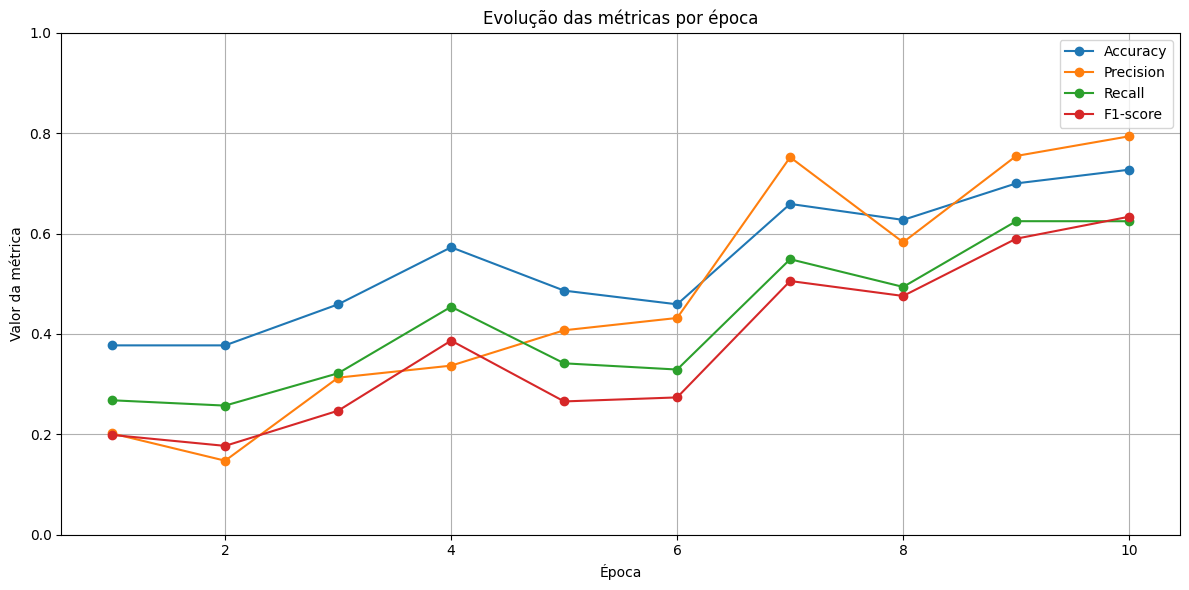

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metrics_history.csv")

plt.figure(figsize=(12, 6))
plt.plot(df["epoch"], df["accuracy"], marker='o', label="Accuracy")
plt.plot(df["epoch"], df["precision"], marker='o', label="Precision")
plt.plot(df["epoch"], df["recall"], marker='o', label="Recall")
plt.plot(df["epoch"], df["f1"], marker='o', label="F1-score")
plt.xlabel("Época")
plt.ylabel("Valor da métrica")
plt.title("Evolução das métricas por época")
plt.legend()
plt.grid(True)
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

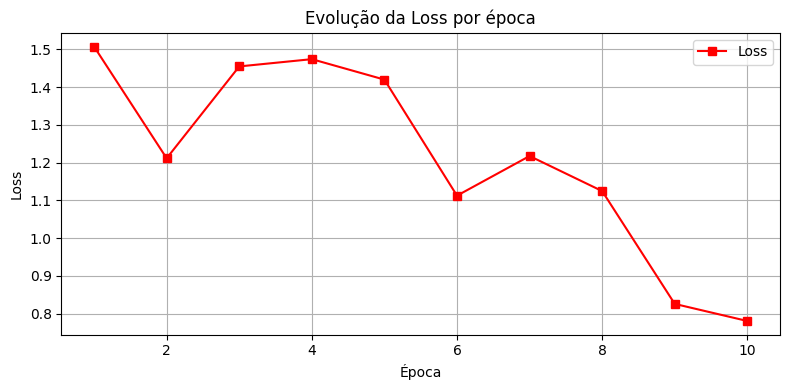

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(df["epoch"], df["loss"], marker='s', color='red', label="Loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Loss por época")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()